In [3]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.backends.backend_pdf import PdfPages
#from numba import jit, njit
from matplotlib import rc
from scipy.optimize import curve_fit
from scipy.stats import chi2
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as plticker
import scipy.stats as stats
from pylab import *
from functools import partial
from scipy.optimize import fsolve
# !pip install scikit-learn

In [4]:
# plot settings
rc('axes', linewidth=3)
rc('text', usetex=True)
rc('font', size=25, family='arial', weight='bold')
rc('lines',linewidth=1.5,color='blue')
rc('xtick.major', pad=14, size=7, width=3)
rc('ytick.major', pad=14, size=7, width=3)
rc('xtick.minor', pad=14, size=7, width=3)
rc('ytick.minor', pad=14, size=7, width=3)

In [5]:
L = np.array([6, 8, 12, 14, 16, 18])
LT = np.array([120, 160, 120, 140, 160, 180])
LT = 4*LT
VOL = L*L

beta = np.array([0.1, 0.5, 0.7, 1.0, 1.2, 1.5, 1.7, 2.0, 2.5, 3.0, 4.0, 10.0])

timeL16 = np.array([8.179, 8.707, 8.806, 10.464, 21.310, 19.405, 32.085, 152.838, 77.225, 428.842, 2179.402, 3247.275])

timeL12 = np.array([2.228, 2.831, 3.259, 4.849, 11.574, 27.111, 143.372, 140.131, 182.314, 508.129, 655.340, 1263.001])

timeL8 = np.array([28.766, 38.205, 68.971, 17.806, 44.372, 195.821, 98.107, 208.635, 345.346, 481.123, 502.790, 534.786])

timeL6 = np.array([1.266, 1.432, 1.725, 3.551, 7.186, 58.032, 51.432, 90.482, 104.502, 91.750, 120.782, 147.327])

timeL14 = np.array([7.666, 10.089, 10.461, 12.764, 16.765, 73.130, 24.409, 46.849, 610.331, 856.542, 1132.164, 2912.146])

timeL18 = np.array([19.700, 22.785, 27.796, 30.541, 31.178, 31.773, 41.365, 50.923, 76.973, 60.071, 935.260, 4696.609])

timeL20 = np.array([39.066, 36.432, 39.703, 19.431, 24.114, 27.967, 65.134, 40.965, 106.225, 166.315, 717.849, 1356.220])

10.0
[ 147.327  534.786 1263.001 2912.146 3247.275 4696.609]


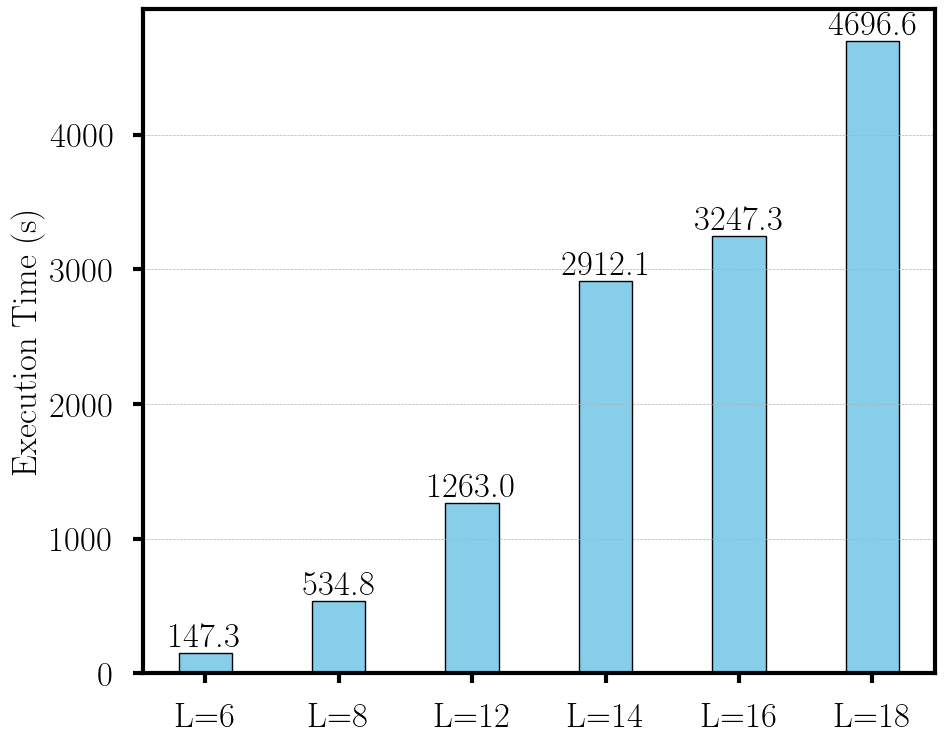

In [6]:
# plt.figure(figsize=(10, 8))
idx = 11
print(beta[idx])
# plt.plot(beta, timeL6, '-o', color = 'r', label=f'$L=6$')
# plt.plot(beta, timeL8, '-*', color = 'g', label=f'$L=8$')
# plt.plot(beta, timeL12, '-d', color = 'b', label=f'$L=12$')
# plt.plot(beta, timeL16, '-p', color = 'y', label=f'$L=16$')
# plt.legend()
# plt.show()

labels = [f"L={l}" for l in L]
execution_times = np.array([timeL6[idx], timeL8[idx], timeL12[idx], timeL14[idx], timeL16[idx], timeL18[idx]])
print(execution_times)
plt.figure(figsize=(10, 8))
bars = plt.bar(labels, execution_times, width=0.4, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.1f}', ha='center', va='bottom')

plt.ylabel('Execution Time (s)')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('weak scaling.pdf')
plt.show()


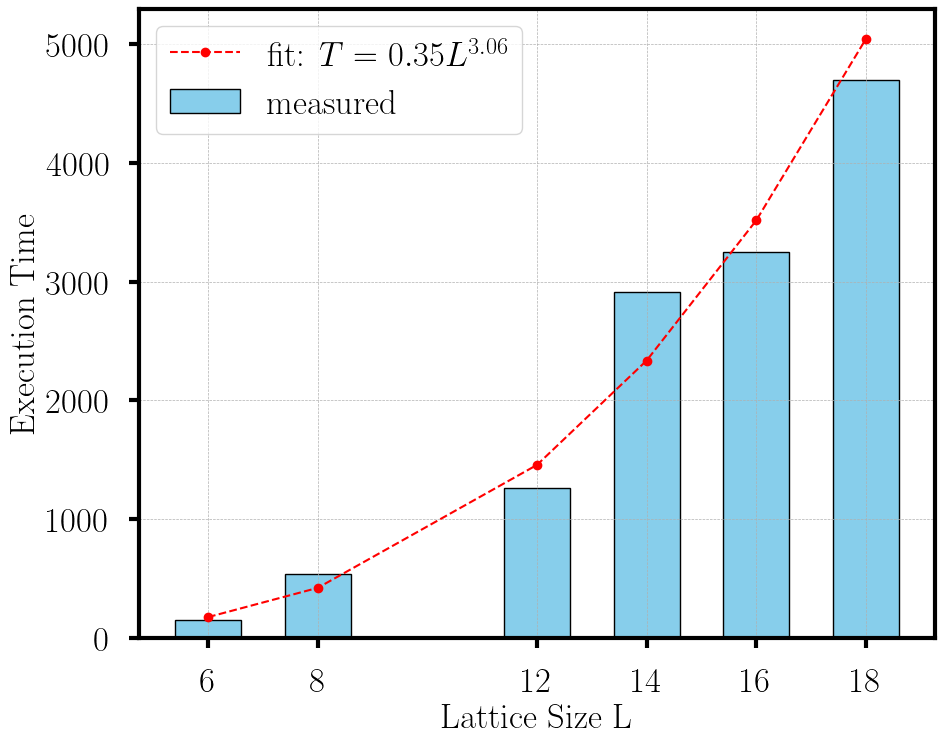

In [7]:
L = np.array([6, 8, 12, 14, 16, 18])
LT = 10*L
Meas = 1
idx=11
T = np.array([timeL6[idx], timeL8[idx], timeL12[idx], timeL14[idx], timeL16[idx], timeL18[idx]])


log_L = np.log(L)
log_LT = np.log(LT)
log_T = np.log(T)

A = np.column_stack((log_L, log_LT, np.ones_like(log_L)))
coeffs, _, _, _ = np.linalg.lstsq(A, log_T, rcond=None)
p, q, log_a = coeffs
a = np.exp(log_a)


def predict_time(L, LT, Meas, a=a, p=p, q=q, r=1):
    return a * L**p * LT**q * Meas**r


T_fit = predict_time(L, LT, Meas)


plt.figure(figsize=(10, 8))
bar_width = 0.35
x = np.arange(len(L))


bars = plt.bar(L, T, width=1.2, color='skyblue', edgecolor='black', label='measured')    
plt.plot(L, T_fit, 'r--o', label=fr'fit: $T = {a:.2f}L^{{{p+q:.2f}}}$')

# plt.figure(figsize=(10, 8))
# bars = plt.bar(labels, execution_times, width=0.4, color='skyblue', edgecolor='black')

# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.1f}', ha='center', va='bottom')

plt.ylabel('Execution Time (s)')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.xticks(L)
plt.ylabel("Execution Time")
plt.xlabel('Lattice Size L')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('weak scaling_fit.png')
plt.show()
